In [1]:
# Import basic packages
import numpy as np
import scipy as sp
import pandas as pd
from astropy.io import fits
import fitsio as ft
import os

# ==========================================
# Matplotlib, urlib etc 
import urllib
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output, display
from PIL import Image
%matplotlib inline

In [5]:
#Read in files for V4 training
randoms = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/Randoms/X_randoms_feat.npy")
randoms_l = np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/Randoms/y_randoms_lab.npy")
burcin = np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/X_mat_v4_a.npy")
burcin_l = np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/y_lab_v4_a.npy")

In [6]:
#Grab just the positives from Burcin's training
sel = (burcin_l == 1)
burcin = burcin[sel]
burcin_l = burcin_l[sel]

In [10]:
#Read in real skim data
realSkim = ft.read('/data/des80.b/data/burcinmp/y6_lsbg/y6/v2/y6_gold_2_0_lsb_skim.fits')

#Read in training matrices

# Feature matrices
trainDefault = np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/X_mat_v4_a.npy")

trainV3 = np.concatenate((np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/X_mat_v4_a.npy"),
                            np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/Randoms/X_randoms_feat.npy"),
                            np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/X_conf_negative_feat.npy")))
trainV4 = np.concatenate((burcin,randoms))

# Label matrices
labelDefault = np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/y_lab_v4_a.npy")

labelV3 = np.concatenate((np.load("/data/des80.b/data/burcinmp/y6_lsbg/y6/test_classifier/random_forest/v3/y_lab_v4_a.npy"),
                             np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/Randoms/y_randoms_lab.npy"),
                             np.load("/data/des81.a/data/kherron/LSBG/trainingfiles/y_conf_negative_lab.npy")))
labelV4 = np.concatenate((burcin_l,randoms_l))

In [11]:
# create arrays of the magnitudes from each training file
skim_mag_r = 0.263*realSkim['FLUX_RADIUS_R']
default_mag_r = trainDefault[:,8]
v3_mag_r = trainV3[:,8]
v4_mag_r = trainV4[:,8]

In [20]:
# generate histograms for magnitudes
hist_skim, bin_skim = np.histogram(skim_mag_r,density=True,range = (0,20))
hist_default, bin_default = np.histogram(default_mag_r,density=True,bins=bin_skim[:-1])


In [21]:
print(np.unique((v3_mag_r > 67)))

[False  True]


In [22]:
sum(hist_skim)

0.5

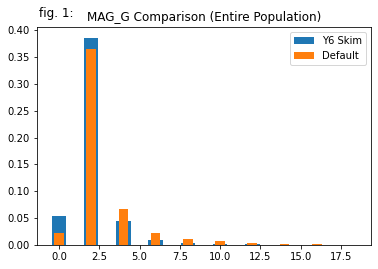

In [24]:
_ = plt.figure(facecolor = 'white')
plt.bar(bin_skim[:-1],hist_skim, label = 'Y6 Skim',width=0.9)
plt.bar(bin_default[:-1],hist_default, label='Default',width = 0.6)

#plt.xlim(10,30)
plt.legend()
plt.title("MAG_G Comparison (Entire Population)")
plt.suptitle("fig. 1:", x = 0.17, y = 0.95)
plt.show()

In [28]:
# Generate arrays for positives and negatives

#Default
sel = labelDefault == 1
positivesTrainDefault = default_mag_r[sel]
sel = labelDefault == 0
negativesTrainDefault = default_mag_r[sel]

#V3 classifier
sel = labelV3 == 1
positivesTrainV3 = v3_mag_r[sel]
sel = labelV3 == 0
negativesTrainV3 = v3_mag_r[sel]

#V4 classifier
sel = labelV4 == 1
positivesTrainV4 = v4_mag_r[sel]
sel = labelV4 == 0
negativesTrainV4 = v4_mag_r[sel]

#Skim Results v3 and default


#==========positives================
V4CoAdd = np.load('/data/des81.a/data/kherron/LSBG/V4/y6_lsbg_v4.npy')
sel = np.in1d(realSkim['COADD_OBJECT_ID'],V4CoAdd)
positiveSkimV4 = skim_mag_r[sel]

V3CoAdd = np.load('/data/des81.a/data/kherron/LSBG/V3/y6_lsbg_v3.npy')
sel = np.in1d(realSkim['COADD_OBJECT_ID'],V3CoAdd)
positiveSkimV3 = skim_mag_r[sel]

DefaultCoAdd = np.load('/data/des81.a/data/kherron/LSBG/DefaultResults/y6_lsbg_Default.npy')
sel = np.in1d(realSkim['COADD_OBJECT_ID'],DefaultCoAdd)
positiveSkimDefault = skim_mag_r[sel]


#==========negatives===============
V4CoAdd = np.load('/data/des81.a/data/kherron/LSBG/V4/y6_negative_v4.npy')
sel = np.in1d(realSkim['COADD_OBJECT_ID'],V4CoAdd)
negativeSkimV4 = skim_mag_r[sel]

V3CoAdd = np.load('/data/des81.a/data/kherron/LSBG/V3/y6_negative_v3.npy')
sel = np.in1d(realSkim['COADD_OBJECT_ID'],V3CoAdd)
negativeSkimV3 = skim_mag_r[sel]

DefaultCoAdd = np.load('/data/des81.a/data/kherron/LSBG/DefaultResults/y6_negative_Default.npy')
sel = np.in1d(realSkim['COADD_OBJECT_ID'],DefaultCoAdd)
negativeSkimDefault = skim_mag_r[sel]





In [29]:
labelV4

array([1., 1., 1., ..., 0., 0., 0.])

In [30]:
#Histograms for training LSBGs
hist_TrainDefault_LSBG, bins_TrainDefault_LSBG = np.histogram(positivesTrainDefault,density=True,bins=bin_skim[:-1])
hist_TrainV3_LSBG, bins_TrainV3_LSBG = np.histogram(positivesTrainV3,density=True,bins=bin_skim[:-1])
hist_TrainV4_LSBG, bins_TrainV4_LSBG = np.histogram(positivesTrainV4,density=True,bins=bin_skim[:-1])

#Histograms for evaluated LSBGs
hist_v4_LSBG, bins_v4_LSBG = np.histogram(positiveSkimV4,density=True,bins=bin_skim[:-1])
hist_v3_LSBG, bins_v3_LSBG = np.histogram(positiveSkimV3,density=True,bins=bin_skim[:-1])
hist_Default_LSBG,bins_Default_LSBG = np.histogram(positiveSkimDefault, density=True,bins=bin_skim[:-1])

#Histograms for training artifacts
hist_TrainDefault_art, bins_TrainDefault_art = np.histogram(negativesTrainDefault,density=True,bins=bin_skim[:-1])
hist_TrainV3_art, bins_TrainV3_art = np.histogram(negativesTrainV3,density=True,bins=bin_skim[:-1])
hist_TrainV4_art, bins_TrainV4_art = np.histogram(negativesTrainV4,density=True,bins=bin_skim[:-1])

#Histograms for evaluated artifacts
hist_v4_art, bins_v4_art = np.histogram(negativeSkimV4,density=True,bins=bin_skim[:-1])
hist_v3_art, bins_v3_art = np.histogram(negativeSkimV3,density=True,bins=bin_skim[:-1])
hist_Default_art,bins_Default_art = np.histogram(negativeSkimDefault, density=True,bins=bin_skim[:-1])

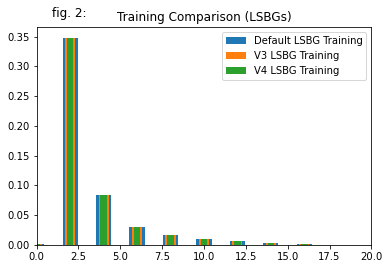

In [31]:
_ = plt.figure(facecolor = 'white')
plt.bar(bins_TrainDefault_LSBG[:-1],hist_TrainDefault_LSBG, label = 'Default LSBG Training',width=0.9)
plt.bar(bins_TrainV3_LSBG[:-1],hist_TrainV3_LSBG, label='V3 LSBG Training',width = 0.6)
plt.bar(bins_TrainV4_LSBG[:-1],hist_TrainV4_LSBG, label='V4 LSBG Training',width = 0.4)

plt.xlim(0,20)
plt.legend()
plt.title("Training Comparison (LSBGs)")
plt.suptitle("fig. 2:", x = 0.2, y = 0.95)
plt.show()

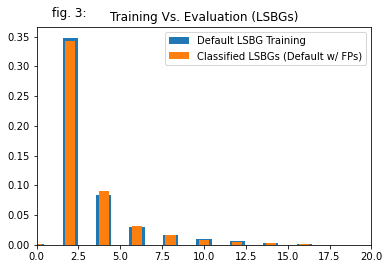

In [32]:
_ = plt.figure(facecolor = 'white')
plt.bar(bins_TrainDefault_LSBG[:-1],hist_TrainDefault_LSBG, label = 'Default LSBG Training',width = 0.9)
plt.bar(bins_Default_LSBG[:-1],hist_Default_LSBG, label='Classified LSBGs (Default w/ FPs)',width = 0.6)

plt.xlim(0,20)
plt.legend()
plt.title("Training Vs. Evaluation (LSBGs)")
plt.suptitle("fig. 3:", x = 0.2, y = 0.95)
plt.show()

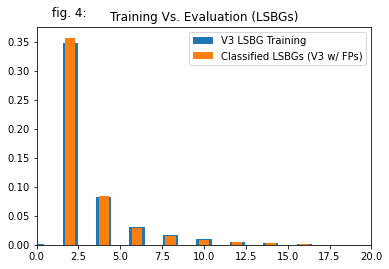

In [33]:
_ = plt.figure(facecolor = 'white')
plt.bar(bins_TrainV3_LSBG[:-1],hist_TrainV3_LSBG, label = 'V3 LSBG Training',width = 0.9)
plt.bar(bins_v3_LSBG[:-1],hist_v3_LSBG, label='Classified LSBGs (V3 w/ FPs)',width = 0.6)

plt.xlim(0,20)
plt.legend()
plt.title("Training Vs. Evaluation (LSBGs)")
plt.suptitle("fig. 4:", x = 0.2, y = 0.95)
plt.show()

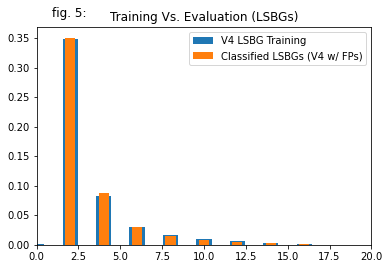

In [34]:
_ = plt.figure(facecolor = 'white')
plt.bar(bins_TrainV4_LSBG[:-1],hist_TrainV4_LSBG, label = 'V4 LSBG Training',width = 0.9)
plt.bar(bins_v4_LSBG[:-1],hist_v4_LSBG, label='Classified LSBGs (V4 w/ FPs)',width = 0.6)

plt.xlim(0,20)
plt.legend()
plt.title("Training Vs. Evaluation (LSBGs)")
plt.suptitle("fig. 5:", x = 0.2, y = 0.95)
plt.show()

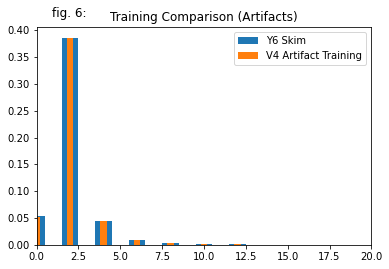

In [36]:
_ = plt.figure(facecolor = 'white')

plt.bar(bin_skim[:-1],hist_skim, label = 'Y6 Skim',width=1)
#plt.bar(bins_TrainDefault_art[:-1],hist_TrainDefault_art, label = 'Default Artifact Training',width=0.8)
#plt.bar(bins_TrainV3_art[:-1],hist_TrainV3_art, label='V3 Artifact Training',width = 0.6)
plt.bar(bins_TrainV4_art[:-1],hist_TrainV4_art, label='V4 Artifact Training',width = 0.4)

plt.xlim(0,20)
plt.legend()
plt.title("Training Comparison (Artifacts)")
plt.suptitle("fig. 6:", x = 0.2, y = 0.95)
plt.show()